Took 0.06573820 seconds to perform QR decomposition
PSNR: 13.207589666085404
Truncated to rank: 20


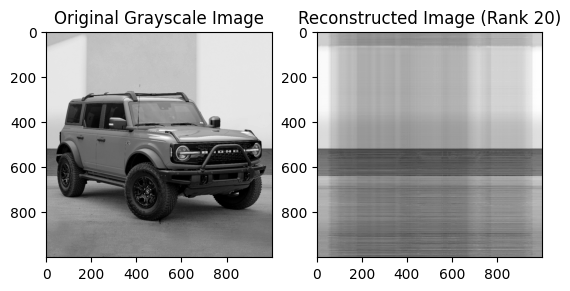

In [14]:
import imageio as iio
import numpy as np
from matplotlib import pyplot
from skimage import color
import time
from skimage.metrics import peak_signal_noise_ratio as psnr
import factorizations as fct
from PIL import Image
import cv2

img = color.rgb2gray(iio.v3.imread('bronco.jpg'))
img = cv2.resize(img, (1000, 1000))

# ====== QR DECOMPOSITION ======

start_qr_time = time.time()
# Perform QR decomposition
Q, R = np.linalg.qr(img)
end_qr_time = time.time()

print('Took {:.8f} seconds to perform QR decomposition'.format(end_qr_time - start_qr_time))

# Choose a rank to approximate the image
rank = 20
RANK = rank

rank_list = np.arange(10, rank)

# Truncate Q and R to the chosen rank
Q_truncated = Q[:, :rank]
R_truncated = R[:rank, :]

# Reconstruct the image using the truncated matrices
img_reconstructed = Q_truncated @ R_truncated

# Display the original grayscale image
pyplot.subplot(1, 2, 1)
pyplot.imshow(img, cmap=pyplot.cm.gray)
pyplot.title('Original Grayscale Image')

# Display the reconstructed image
pyplot.subplot(1, 2, 2)
pyplot.imshow(img_reconstructed, cmap=pyplot.cm.gray)
pyplot.title('Reconstructed Image (Rank {})'.format(rank))

# Calculate the PSNR
print("PSNR:", psnr(img, img_reconstructed))
print("Truncated to rank:", RANK)

pyplot.show()

psnr_list_qr = []
bytes_list_qr = []

# for this_rank in rank_list:
#     Q_truncated = Q[:, :this_rank]
#     R_truncated = R[:this_rank, :]
#     img_reconstructed = Q_truncated @ R_truncated
    
#     this_psnr = psnr(img, img_reconstructed)

#     psnr_list_qr.append(this_psnr)

SVD decomposition took 0.05739689 seconds
24.333365747060025


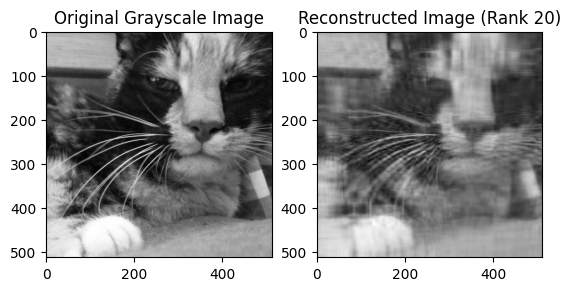

[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 25

ValueError: x and y must have same first dimension, but have shapes (990,) and (0,)

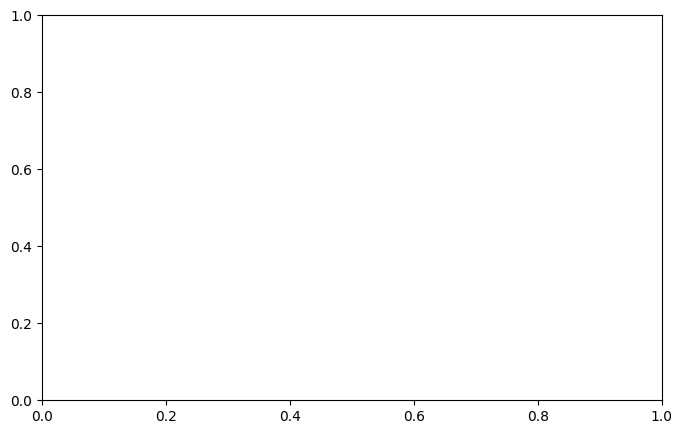

In [13]:
img = color.rgb2gray(iio.v3.imread('imageio:wikkie.png'))


rank = 20

# Start timing for SVD decomposition
start_svd_time = time.time()

# Perform SVD decomposition
U, S, Vt = np.linalg.svd(img, full_matrices=False)

end_svd_time = time.time()
print("SVD decomposition took {:.8f} seconds".format(end_svd_time - start_svd_time))

# Use only the top 'rank' singular values and corresponding vectors
U_truncated = U[:, :rank]
S_truncated = np.diag(S[:rank])
Vt_truncated = Vt[:rank, :]

# Reconstruct the image using the truncated matrices
img_reconstructed = U_truncated @ S_truncated @ Vt_truncated

# Display the original grayscale image
pyplot.subplot(1, 2, 1)
pyplot.imshow(img, cmap=pyplot.cm.gray)
pyplot.title('Original Grayscale Image')

# Display the reconstructed image
pyplot.subplot(1, 2, 2)
pyplot.imshow(img_reconstructed, cmap=pyplot.cm.gray)
pyplot.title('Reconstructed Image (Rank {})'.format(rank))

print(psnr(img, img_reconstructed))

pyplot.show()

psnr_list_svd = []
bytes_list_svd = []

# for this_rank in rank_list:
#     U_truncated = U[:, :this_rank]
#     S_truncated = np.diag(S[:this_rank])
#     Vt_truncated = Vt[: this_rank, :]
#     img_reconstructed = U_truncated @ S_truncated @ Vt_truncated
#     this_psnr = psnr(img, img_reconstructed)

#     psnr_list_svd.append(this_psnr)

# Create a plot
pyplot.figure(figsize=(8, 5))

print(rank_list)

print(psnr_list_qr)
print(psnr_list_svd)

print(len(rank_list))
print(len(psnr_list_qr))

# Plot the first line
pyplot.plot(rank_list, psnr_list_qr, label='QR', color='blue')  # Change the color as needed

# Plot the second line
pyplot.plot(rank_list, psnr_list_svd, label='SVD', color='orange')  # Change the color as needed

# Adding title and labels
pyplot.xlabel('Rank')
pyplot.ylabel('PSNR')

# Show legend
pyplot.legend()

# Show the plot
pyplot.show()


# # Create a plot
# pyplot.figure(figsize=(8, 5))

# # Plot the first line
# pyplot.plot(ratio_list_qr, psnr_list_qr, label='QR', color='blue')  # Change the color as needed

# # Plot the second line
# pyplot.plot(ratio_list_svd, psnr_list_svd, label='SVD', color='orange')  # Change the color as needed

# # Adding title and labels
# pyplot.title('PNSR vs. Compression Ratio (Bytes/Bytes) for SVD and QR Decomposition')
# pyplot.xlabel('Compression Ratio')
# pyplot.ylabel('PSNR')

# # Show legend
# pyplot.legend()

# # Show the plot
# pyplot.show()

# print(bytes_list_qr)

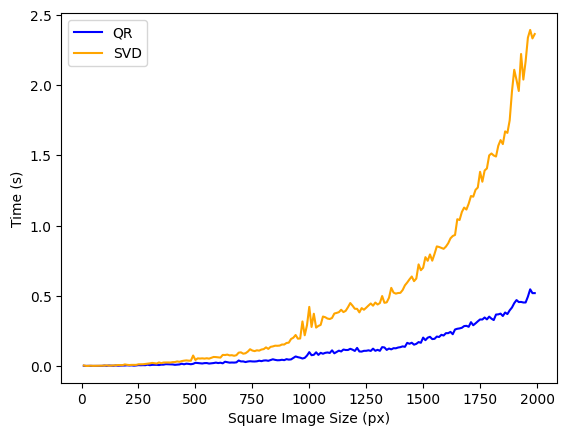

In [5]:
sizes_list = np.arange(10, 2000, 10)
qr_times_list = []
svd_times_list = []

for size in sizes_list:

    img_resized = cv2.resize(img, (size, size))

    start_qr_time = time.time()
    Q, R = np.linalg.qr(img_resized)
    end_qr_time = time.time()
    qr_times_list.append(end_qr_time - start_qr_time)

    # SVD

    start_svd_time = time.time()
    U, S, Vt = np.linalg.svd(img_resized, full_matrices=False)
    end_svd_time = time.time()
    svd_times_list.append(end_svd_time - start_svd_time)

# Create a plot

# Plot the first line

pyplot.plot(sizes_list, qr_times_list, label='QR', color='blue')  # Change the color as needed


# Plot the second line

pyplot.plot(sizes_list, svd_times_list, label='SVD', color='orange')  # Change the color as needed

# Adding title and labels

pyplot.xlabel('Square Image Size (px)')

pyplot.ylabel('Time (s)')

# Show legend

pyplot.legend()

# Show the plot

pyplot.show()

